In [8]:
!unzip /content/dataset.zip

Archive:  /content/dataset.zip
  inflating: imbalanced_data.csv     
  inflating: raw_data.csv            


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df_imbalance=pd.read_csv("/content/imbalanced_data.csv")

In [12]:
df_imbalance

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


<Axes: xlabel='label'>

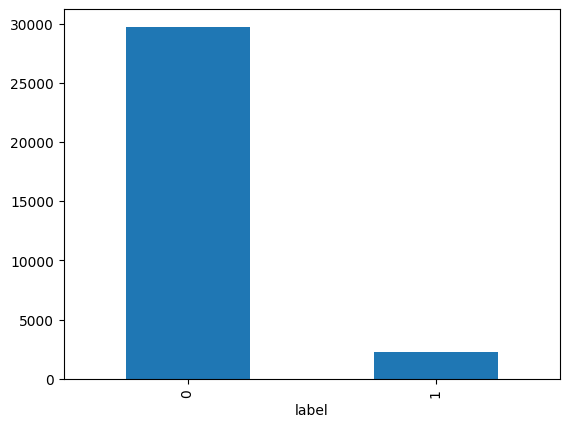

In [14]:
df_imbalance["label"].value_counts().plot(kind="bar")
# hate_speech=1 , non_hate_speech=0

In [15]:
df_imbalance.shape

(31962, 3)

In [16]:
df_imbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [17]:
df_imbalance.isnull().sum()

,0
id,0
label,0
tweet,0


In [18]:
df_imbalance.duplicated().sum()

0

In [19]:
df_imbalance.drop(columns="id",inplace=True)

In [20]:
df_imbalance.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [21]:
df_raw=pd.read_csv("/content/raw_data.csv")

In [22]:
df_raw.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [23]:
df_raw["class"].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [24]:
df_raw.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [25]:
df_raw.drop(columns=["Unnamed: 0","count","hate_speech","offensive_language","neither"],inplace=True)

In [26]:
df_raw.sample(10)

,class,tweet
17120,1,RT @Rob_San9993: @214bighappy gunna have me sc...
5240,1,@YungOBG hoe meter went off!
9013,2,Everyone thinks that I'm not the person on my ...
23400,1,You right fam. RT @pufntrees: @202SOLE jus pee...
245,1,"""@SukMySweetness: money only impress the simpl..."
6265,1,@jkatz_ @kaylee_binion14 bitch. &#128534;
9728,1,He got a cousin named jason that rock da Gary ...
19048,1,RT @girlposts: my hobbies include being a sarc...
12111,1,Just a young niggah wit a promised future. @Ca...
4545,1,@RihannaHasAids I had free tickets and couldn'...


<Axes: xlabel='class'>

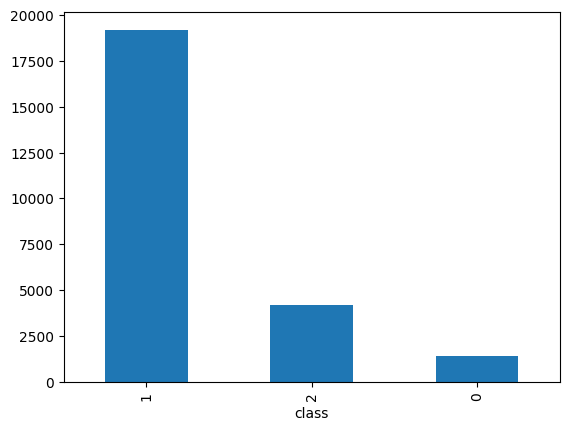

In [27]:
df_raw["class"].value_counts().plot(kind="bar")

In [28]:
# class 0 =hate speech
# class 1 = abusive
# class 2 =no hate

In [29]:
df_raw=df_raw.replace({0:1})

In [30]:
df_raw=df_raw.replace({2:0})

In [31]:
df_raw["class"].value_counts()

,count
class,
1,20620
0,4163


In [32]:
df_raw.rename(columns={"class":"label"},inplace=True)

In [33]:
df_raw

,label,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [34]:
df=pd.concat((df_imbalance,df_raw),axis=0)

In [35]:
df["label"].value_counts()

,count
label,
0,33883
1,22862


In [36]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 22.2 MB/s eta 0:00:00


In [37]:
import re
import string
import emoji
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the stemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [38]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [39]:
# Function to remove emojis
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# Function to clean each tweet
def clean_tweet(tweet):
    # Remove mentions (@username)
    tweet = re.sub(r'@\w+', '', tweet)

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)

    # Remove HTML entities
    tweet = re.sub(r'&\w+;', '', tweet)

    # Remove emojis
    tweet = remove_emoji(tweet)

    # Remove punctuation and unwanted characters including square boxes
    tweet = re.sub(r'[\[\]{}<>]', '', tweet)  # Remove square boxes and braces
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)

    # Lowercase the tweet
    tweet = tweet.lower()

    # Remove extra whitespace (including special characters and redundant spaces)
    tweet = re.sub(r'\s+', ' ', tweet)  # Replace multiple spaces with a single space
    tweet = tweet.strip()  # Remove leading and trailing whitespace

    # Tokenize the tweet
    tokens = nltk.word_tokenize(tweet)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stem the tokens
    tokens = [stemmer.stem(word) for word in tokens]

    # Join the tokens back to a single string
    clean_tweet = ' '.join(tokens)

    return clean_tweet

In [40]:
df["tweet"]=df["tweet"].apply(clean_tweet)

In [41]:
df=df.reset_index(drop=True)

In [42]:
df

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,model love u take u time urð± ðððð...
4,0,factsguid societi motiv
...,...,...
56740,1,you muthafin lie right tl trash mine bibl scri...
56741,0,youv gone broke wrong heart babi drove redneck...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitch tellin lie


In [43]:
X=df["tweet"]
y=df["label"]

In [44]:
df

,label,tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank lyft credit cant use caus dont offer whe...
2,0,bihday majesti
3,0,model love u take u time urð± ðððð...
4,0,factsguid societi motiv
...,...,...
56740,1,you muthafin lie right tl trash mine bibl scri...
56741,0,youv gone broke wrong heart babi drove redneck...
56742,1,young buck wan na eat dat nigguh like aint fuc...
56743,1,youu got wild bitch tellin lie


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
import keras
print(keras.__version__)

3.4.1


In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [48]:
# Step 2: Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initializing the Tokenizer
max_words = 55000  # Limit to the top 55,000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)  # Fit the tokenizer only on the training data

# Step 4: Converting Texts to Sequences
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Step 5: Pad the Sequences
max_length = 350  # Set the maximum length of sequences
X_train_padded = pad_sequences(train_sequences, maxlen=max_length)
X_test_padded = pad_sequences(test_sequences, maxlen=max_length)


In [49]:
X_test_padded

array([[    0,     0,     0, ...,  1484,     1,  2915],
       [    0,     0,     0, ...,  2390, 14414,   563],
       [    0,     0,     0, ...,   193,   216,   988],
       ...,
       [    0,     0,     0, ..., 13892,   795, 41995],
       [    0,     0,     0, ...,   205,   206,   202],
       [    0,     0,     0, ...,   216,   103,  2796]], dtype=int32)

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Assuming max_words and max_len are defined correctly
max_words = 55000  # Maximum number of unique words
max_len = 350      # Maximum length of sequences

# Create the model architecture
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100))  # Removed input_length
model.add(SpatialDropout1D(0.3))  # Increased dropout for regularization
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))  # Increased units for LSTM layer
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Build the model
model.build((None, max_len))  # Specify the input shape here

# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 350, 100)            │       5,500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ (None, 350, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,617,377 (21.43 MB)

 Trainable params: 5,617,377 (21.43 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])



In [52]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for better training management
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras',  # Change the file extension to .keras
                                    monitor='val_loss',
                                    save_best_only=True,
                                    verbose=1)

# Model training with validation split and callbacks
history = model.fit(X_train_padded, y_train,
                    batch_size=128,
                    epochs=10,  # Increase epochs for better training
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint])  # Include callbacks for early stopping and checkpointing


Epoch 1/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8167 - loss: 0.3808
Epoch 1: val_loss improved from inf to 0.14962, saving model to best_model.keras
284/284 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.8170 - loss: 0.3804 - val_accuracy: 0.9486 - val_loss: 0.1496
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9626 - loss: 0.1078
Epoch 2: val_loss improved from 0.14962 to 0.14716, saving model to best_model.keras
284/284 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.9626 - loss: 0.1078 - val_accuracy: 0.9486 - val_loss: 0.1472
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9733 - loss: 0.0820
Epoch 3: val_loss did not improve from 0.14716
284/284 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.9733 - loss: 0.0820 - val_accuracy: 0.9498 - val_loss: 0.1570
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9821 - loss: 0.0552
Epoch 4: val_loss did not improve from 0.14716
284/284 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - ac

In [58]:
# Model evaluation
accr = model.evaluate(X_test_padded, y_test)
print("Test Accuracy:", accr[1])

355/355 ━━━━━━━━━━━━━━━━━━━━ 57s 159ms/step - accuracy: 0.9471 - loss: 0.1569
Test Accuracy: 0.9465150833129883


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [55]:
# Make predictions on the test set
predictions = model.predict(X_test_padded)

# Convert predictions to binary labels
predicted_labels = (predictions > 0.5).astype(int)  # Assuming binary classification


355/355 ━━━━━━━━━━━━━━━━━━━━ 56s 158ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate the classification report
print(classification_report(y_test, predicted_labels))

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:\n", cm)


In [ ]:
import pickle
with open("tokenizer.pickle","wb") as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

In [59]:
model.save("model.h5")

In [57]:
load_model=keras.models.load_model("model.h5")